### Index number : 190026T 
### Name         : AHAMED M.I.I

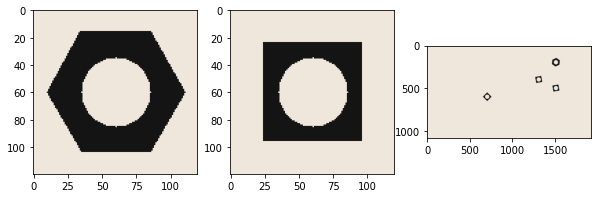

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3, figsize = (10, 5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### Convert the images to grayscale and apply Otsu's thresholding

Threshold for hex nut =  20.0
Threshold for Square nut =  20.0
Threshold for Conveyor belt =  20.0


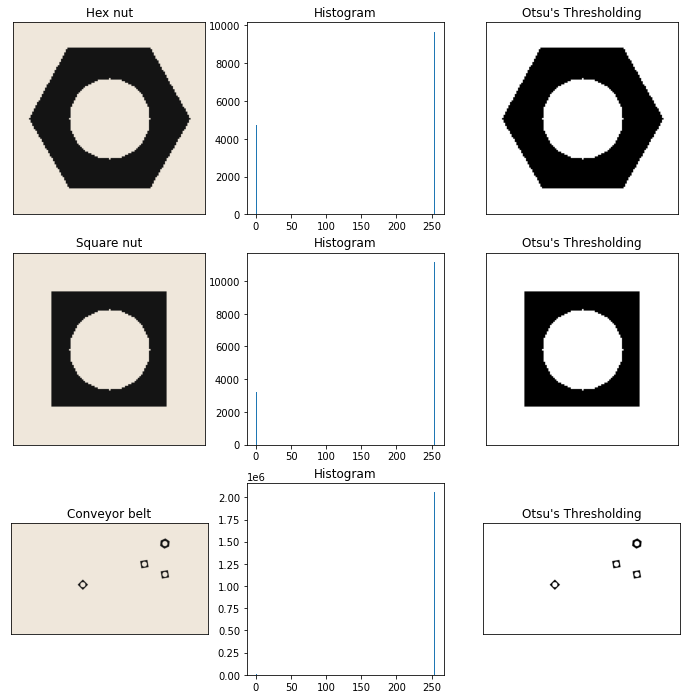

In [2]:
#Convert the images to grayscale
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_template_gray =  cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray =  cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)


# Otsu's thresholding
ret1, hexnut_template_th = cv.threshold(hexnut_template_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, squarenut_template_th = cv.threshold(squarenut_template_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, conveyor_f100_th = cv.threshold(conveyor_f100_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold for hex nut = ", ret1)
print("Threshold for Square nut = ", ret2)
print("Threshold for Conveyor belt = ", ret3)

images = [hexnut_template, 0, hexnut_template_th, 
          squarenut_template, 0, squarenut_template_th,
          conveyor_f100, 0, conveyor_f100_th]

titles = ['Hex nut', 'Histogram', "Otsu's Thresholding",
          'Square nut', 'Histogram', "Otsu's Thresholding",
          'Conveyor belt', 'Histogram', "Otsu's Thresholding"]

fig, ax = plt.subplots(3, 3, figsize = (12, 12))

for i in range(3):
    ax[i][0].imshow(cv.cvtColor(images[i*3], cv.COLOR_RGB2BGR))
    ax[i][0].set_title(titles[i*3]), ax[i][0].set_xticks([]), ax[i][0].set_yticks([])

    ax[i][1].hist(images[i*3 + 2].ravel(), 256)
    ax[i][1].set_title(titles[i*3+1])

    ax[i][2].imshow(images[i*3+2], 'gray')
    ax[i][2].set_title(titles[i*3+2]), ax[i][2].set_xticks([]), ax[i][2].set_yticks([])

### Morphological closing to remove small holes inside the foreground by using a 3×3 kernel

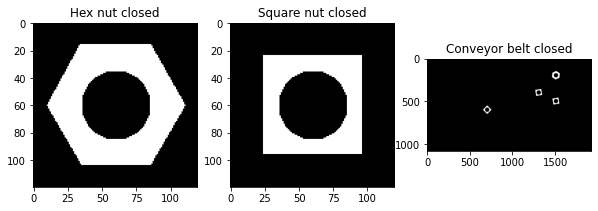

In [3]:
#3x3 kernel
kernel = np.ones((3, 3), np.uint8)

#closing
hexnut_template_th = np.invert(hexnut_template_th)
hexnut_template_closed = cv.morphologyEx(hexnut_template_th, cv.MORPH_CLOSE, kernel)
squarenut_template_th = np.invert(squarenut_template_th)
squarenut_template_closed = cv.morphologyEx(squarenut_template_th, cv.MORPH_CLOSE, kernel)
conveyor_f100_th = np.invert(conveyor_f100_th)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_th, cv.MORPH_CLOSE, kernel)

images = [hexnut_template_closed, squarenut_template_closed, conveyor_f100_closed]

titles = ['Hex nut closed','Square nut closed', 'Conveyor belt closed']

fig, ax = plt.subplots(1, 3, figsize = (10, 5))

for i in range(3):
    ax[i].imshow(images[i], 'gray')
    ax[i].set_title(titles[i])


### Connected components analysis
##### Here note that the first connected component is the background.

Hex nut connected components = 2
Square nut connected components = 2
Conveyor belt connected components = 5


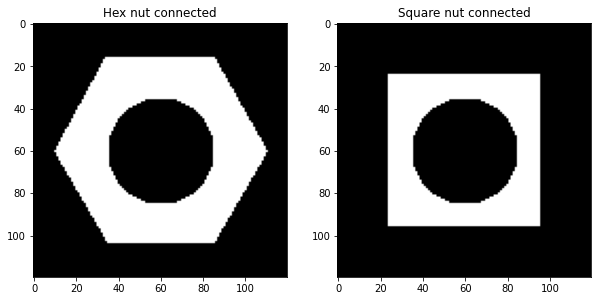

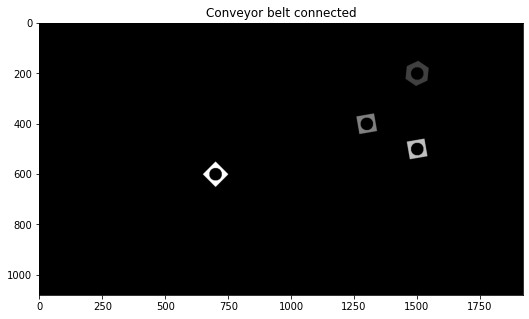

In [4]:
# apply connected component analysis to the thresholded image
# returns (numLabels, labels, stats, centroids)
hexnut_template_connected = cv.connectedComponentsWithStats(hexnut_template_closed, 8, cv.CV_32S)
squarenut_template_connected = cv.connectedComponentsWithStats(squarenut_template_closed, 8, cv.CV_32S)
conveyor_f100_connected = cv.connectedComponentsWithStats(conveyor_f100_closed, 8, cv.CV_32S)

numLabels = [hexnut_template_connected[0], squarenut_template_connected[0], conveyor_f100_connected[0]]
images = [hexnut_template_connected[1], squarenut_template_connected[1], conveyor_f100_connected[1]]
stats = [hexnut_template_connected[2], squarenut_template_connected[2], conveyor_f100_connected[2]]
centroids = [hexnut_template_connected[3], squarenut_template_connected[3], conveyor_f100_connected[3]] 

titles = ['Hex nut connected','Square nut connected', 'Conveyor belt connected']

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

for i in range(2):
    ax[i].imshow(images[i], 'gray')
    ax[i].set_title(titles[i])

    print(titles[i], "components =", numLabels[i])

fig, ax = plt.subplots( figsize = (10, 5))
ax.imshow(images[2], 'gray')
ax.set_title(titles[2])
print(titles[2], "components =", numLabels[2])


##### Stats is a matrix of the stats that the function calculates. 
##### It has a length equal to the number of components. 
##### Width equal to the number of stats. There are 5 stats. 

    1) Leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
    2) Topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
    3) The horizontal size of the bounding box
    4) The vertical size of the bounding box
    5) The total area (in pixels) of the connected component

##### Centroids are the cordinates of the cnetre of the bounding boxes.

area of background = 9672
area of component 1 = 4728


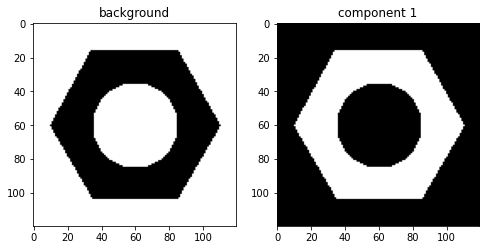

In [5]:
#hex nut
image_num = 0
fig, ax = plt.subplots(1, numLabels[image_num], figsize = (numLabels[image_num]*4, 10))

for i in range(numLabels[image_num]):
    x = stats[image_num][i, cv.CC_STAT_LEFT]
    y = stats[image_num][i, cv.CC_STAT_TOP]
    w = stats[image_num][i, cv.CC_STAT_WIDTH]
    h = stats[image_num][i, cv.CC_STAT_HEIGHT]
    area = stats[image_num][i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[image_num][i]

    if i == 0:
        text = "background"
    else:
        text = "component " + str(i)

    print("area of " + text, "=" , area)

    componentMask = (images[image_num] == i).astype("uint8")*255

    ax[i].imshow(componentMask, 'gray')
    ax[i].set_title(text);

##### Object area in the hexnut template = 4728 (equal to given in the question)

area of background = 11173
area of component 1 = 3227


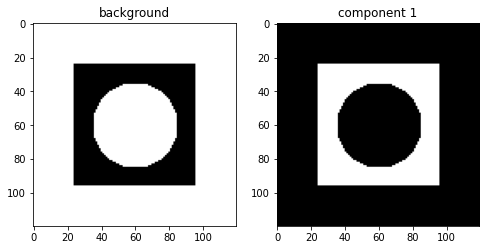

In [6]:
#hex nut
image_num = 1
fig, ax = plt.subplots(1, numLabels[image_num], figsize = (numLabels[image_num]*4, 10))

for i in range(numLabels[image_num]):
    x = stats[image_num][i, cv.CC_STAT_LEFT]
    y = stats[image_num][i, cv.CC_STAT_TOP]
    w = stats[image_num][i, cv.CC_STAT_WIDTH]
    h = stats[image_num][i, cv.CC_STAT_HEIGHT]
    area = stats[image_num][i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[image_num][i]

    if i == 0:
        text = "background"
    else:
        text = "component " + str(i)

    print("area of " + text, "=" , area)

    componentMask = (images[image_num] == i).astype("uint8")*255

    ax[i].imshow(componentMask, 'gray')
    ax[i].set_title(text);

area of background = 2059646
area of component 1 = 4636
area of component 2 = 3087
area of component 3 = 3087
area of component 4 = 3144


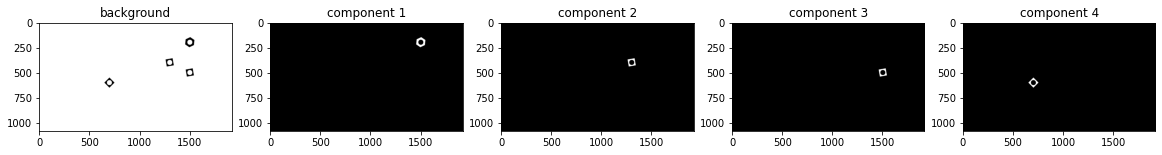

In [7]:
#convoyer belt
image_num = 2
fig, ax = plt.subplots(1, numLabels[image_num], figsize = (numLabels[image_num]*4, 10))

for i in range(numLabels[image_num]):
    x = stats[image_num][i, cv.CC_STAT_LEFT]
    y = stats[image_num][i, cv.CC_STAT_TOP]
    w = stats[image_num][i, cv.CC_STAT_WIDTH]
    h = stats[image_num][i, cv.CC_STAT_HEIGHT]
    area = stats[image_num][i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[image_num][i]

    if i == 0:
        text = "background"
    else:
        text = "component " + str(i)

    print("area of " + text, "=" , area)

    componentMask = (images[image_num] == i).astype("uint8")*255

    ax[i].imshow(componentMask, 'gray')
    ax[i].set_title(text);

## Contour analysis

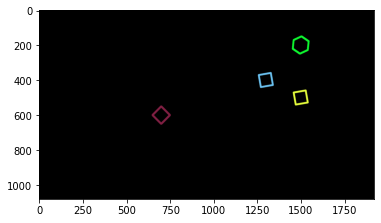

In [8]:
import random

contours, hierarchy = cv.findContours(conveyor_f100_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# contours = contours[0::2]

import random
random.seed(1)
bg = np.zeros((1080,1920,3), dtype=np.uint8)

for i in range(len(contours)):
    color = (random.randint(0,255), random.randint(0,255), random.randint(0,255)) 
    cv.drawContours(bg, contours, i, color, 10, cv.LINE_8, hierarchy, 0)

plt.imshow(cv.cvtColor(bg, cv.COLOR_RGB2BGR));

In [9]:
#visualize conveyor belt
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)

cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []   
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [42]:
#find the contours of the template and stack them
hexnut_contours, hierarchy = cv.findContours(hexnut_template_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_contours, hierarchy = cv.findContours(squarenut_template_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [43]:
#utility functions for couonting

def processFrame(frame):
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    ret , frame = cv.threshold(frame, 0,255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    frame = np.invert(frame)
    frame = cv.morphologyEx(frame, cv.MORPH_CLOSE, kernel)
    return frame

def getContour(frame):
    contours, hierarchy = cv.findContours(frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    return contours

def getObjectCount(frame_contours):
    hex_count = 0
    sqr_count = 0
    for i in range(len(frame_contours)):
        for j in range(len(hexnut_contours)):
            ret = cv.matchShapes(frame_contours[i], hexnut_contours[j], 1, 0.0)
            if ret < 0.001:
                hex_count += 1
        
        for j in range(len(hexnut_contours)):
            ret = cv.matchShapes(frame_contours[i], squarenut_contours[j], 1, 0.0)
            if ret < 0.001:
                sqr_count += 1

    return (hex_count, sqr_count)

Hex nuts in frame 1 = 1
Square nuts in frame 1 = 3
Hex nuts in frame 2 = 1
Square nuts in frame 2 = 3


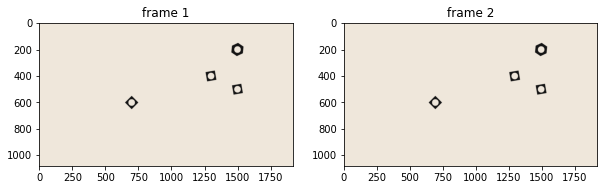

In [44]:
#check object counting for adjacent frames

conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
frame = processFrame(conveyor_f100)
frame_contours = getContour(frame)
(hex_count_f100 ,sqr_count_f100) = getObjectCount(frame_contours)
print("Hex nuts in frame 1 =", hex_count_f100)
print("Square nuts in frame 1 =", sqr_count_f100)

conveyor_f101 =  cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)
frame = processFrame(conveyor_f101)
frame_contours = getContour(frame)
(hex_count_f101 ,sqr_count_f101) = getObjectCount(frame_contours)
print("Hex nuts in frame 2 =", hex_count_f101)
print("Square nuts in frame 2 =", sqr_count_f101)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
ax[0].set_title("frame 1")
ax[1].imshow(cv.cvtColor(conveyor_f101, cv.COLOR_RGB2BGR))
ax[1].set_title("frame 2")
plt.show()

In [39]:
#save the frames in an array

frame_array = []

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)

cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []    
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    frame_array.append(frame)
    
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [40]:
#process frame by frame update counts

count_by_frame = [[], []]
total_count = [[], []]

for i in range(len(frame_array)):
    frame = frame_array[i]
    frame = processFrame(frame)
    frame_contours = getContour(frame)
    (hex_count, sqr_count) = getObjectCount(frame_contours)

    if i == 0:
        total_count[0].append(hex_count)
        total_count[1].append(sqr_count)
    else:
        if hex_count > count_by_frame[0][-1]:
            total_count[0].append(total_count[0][-1] + hex_count - count_by_frame[0][-1])
            
        else:
            total_count[0].append(total_count[0][-1])

        if sqr_count > count_by_frame[1][-1]:
            total_count[1].append(total_count[1][-1] + sqr_count - count_by_frame[1][-1])
            
        else:
            total_count[1].append(total_count[1][-1])

    
    count_by_frame[0].append(hex_count)
    count_by_frame[1].append(sqr_count)

In [41]:
# Writing the video

shape = (1080, 1920, 3)

out = cv.VideoWriter('./conveyor_result_190026T.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    text = "Hex nut count in frame = " + str(count_by_frame[0][i]) 
    cv.putText(frame_array[i], text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)

    text = "Hex nut total count = " + str(total_count[0][i])
    cv.putText(frame_array[i], text , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)

    text = "Square nut count in frame = " + str(count_by_frame[1][i]) 
    cv.putText(frame_array[i], text , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)

    text = "Square nut total count = " + str(total_count[1][i])
    cv.putText(frame_array[i], text , (100, 190), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)

    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()